In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
# This assumes the script is run in the `PlateReader` folder of the data repo

# Load CSV files in pandas DataFrames
mg_em = pd.read_csv('Emission Scans (Bulk)/EmissionScan_MG+MGA_annotated.csv')
mg_exc = pd.read_csv('Excitation Scans (Bulk)/ExcitationScan_MG+MGA_annotated.csv')

dfhbi_em = pd.read_csv('Emission Scans (Bulk)/EmissionScan_DFHBI+BrA_annotated.csv')
dfhbi_exc = pd.read_csv('Excitation Scans (Bulk)/ExcitationScan_DFHBI+BrA_annotated.csv')

mg_em_c = pd.read_csv('Emission Scans (Bulk)/EmissionScan_MG+MGA_annotated_C.csv')
dfhbi_em_c = pd.read_csv('Emission Scans (Bulk)/EmissionScan_DFHBI+BrA_annotated_C.csv')

In [3]:
samples_ab = {
    'Sample X1': 'Water', 
    'Sample X2' : 'IVTM', 
    'Sample X3' : 'A_bar', 
    'Sample X4' : 'A', 
    'Sample X5' : 'B_bar', 
    'Sample X6' : 'B', 
}

samples_c = {
  'Sample X1' : 'C', 
}

In [4]:
# Extract wavelength arrays
mg_em_wav = np.array(mg_em['Wavelength [nm]'])
mg_exc_wav = np.array(mg_exc['Wavelength [nm]'])

dfhbi_em_wav = np.array(dfhbi_em['Wavelength [nm]'])
dfhbi_exc_wav = np.array(dfhbi_exc['Wavelength [nm]'])

mg_em_c_wav = np.array(mg_em_c['Wavelength [nm]'])
dfhbi_em_c_wav = np.array(dfhbi_em_c['Wavelength [nm]'])

In [5]:
def get_mean_std_from_dataset(dataset, sample_dict, normalised = False): 
    
    def normalise(vec):
        return (vec - np.min(vec))/(np.max(vec) - np.min(vec))
    
    mean_dict = {}
    std_dict = {}
    for sample in sample_dict.keys(): 
        mean_dict[sample_dict[sample]] = []
        std_dict[sample_dict[sample]] = []
        temp = []
        for rep in range(3): 
            if rep != 0: 
                sample_name = sample+'.'+str(rep)
            else: 
                sample_name = sample
            if normalised == False: 
                temp.append(np.array(dataset[sample_name]))
            elif normalised == True: 
                temp.append(normalise(np.array(dataset[sample_name])))

        temp_mean = np.mean(temp, axis = 0)
        temp_std = np.std(temp, axis = 0, ddof = 1)
        mean_dict[sample_dict[sample]] = temp_mean
        std_dict[sample_dict[sample]] = temp_std

    return mean_dict, std_dict

In [6]:
# First compute non-normalised mean and standard deviation profiles
normalisation = False

# MG - Emission and Excitation
mg_channel_em_mean, mg_channel_em_std = get_mean_std_from_dataset(mg_em, samples_ab, normalised = normalisation)
mg_channel_exc_mean, mg_channel_exc_std = get_mean_std_from_dataset(mg_exc, samples_ab, normalised = normalisation)

# DFHBI - Emission and Excitation
dfhbi_channel_em_mean, dfhbi_channel_em_std = get_mean_std_from_dataset(dfhbi_em, samples_ab, normalised = normalisation)
dfhbi_channel_exc_mean, dfhbi_channel_exc_std = get_mean_std_from_dataset(dfhbi_exc, samples_ab, normalised = normalisation)

# MG and DFHBI Emission for C
mg_channel_em_c_mean, mg_channel_em_c_std = get_mean_std_from_dataset(mg_em_c, samples_c, normalised = normalisation)
dfhbi_channel_em_c_mean, dfhbi_channel_em_c_std = get_mean_std_from_dataset(dfhbi_em_c, samples_c, normalised = normalisation)

In [7]:
# Combine emission scans (C has no excitation scans)
mg_channel_em_mean = {**mg_channel_em_mean, **mg_channel_em_c_mean}
mg_channel_em_std = {**mg_channel_em_std, **mg_channel_em_c_std}

dfhbi_channel_em_mean = {**dfhbi_channel_em_mean, **dfhbi_channel_em_c_mean}
dfhbi_channel_em_std = {**dfhbi_channel_em_std, **dfhbi_channel_em_c_std}

In [8]:
def process(dictionary, sample_list=None): 
    maxes = {}
    maxes_list = []
    if sample_list is None: 
        sample_list = dictionary.keys()
        
    
    maxes = {
        sample: np.max(dictionary[sample])
        for sample in sample_list
    }
    maxes_list = [np.max(dictionary[sample]) for sample in sample_list]
    
    maxes_ratios = {
        sample: maxes[sample]/np.max(maxes_list)
        for sample in sample_list
    }
    
    return maxes_ratios

In [9]:
# Get information on ratios between profiles to plot normalised profiles with correct relative magnitudes/scaling
# Emission
maxes_mg_em_ratios = process(mg_channel_em_mean)
maxes_dfhbi_em_ratios = process(dfhbi_channel_em_mean)

# Excitation
maxes_mg_exc_ratios = process(mg_channel_exc_mean)
maxes_dfhbi_exc_ratios = process(dfhbi_channel_exc_mean)

# For C - normalising alone since it appears in plot alone
maxes_mg_em_c_ratios = process(mg_channel_em_mean, sample_list = ['Water', 'IVTM', 'C'])
maxes_dfhbi_em_c_ratios = process(dfhbi_channel_em_mean, sample_list = ['Water', 'IVTM', 'C'])

In [10]:
# Finally, compute normalised profiles for plotting
normalisation = True

# MG - Emission and Excitation
mg_channel_em_mean_norm, mg_channel_em_std_norm = get_mean_std_from_dataset(mg_em, samples_ab, normalised = normalisation)
mg_channel_exc_mean_norm, mg_channel_exc_std_norm = get_mean_std_from_dataset(mg_exc, samples_ab, normalised = normalisation)

# DFHBI - Emission and Excitation
dfhbi_channel_em_mean_norm, dfhbi_channel_em_std_norm = get_mean_std_from_dataset(dfhbi_em, samples_ab, normalised = normalisation)
dfhbi_channel_exc_mean_norm, dfhbi_channel_exc_std_norm = get_mean_std_from_dataset(dfhbi_exc, samples_ab, normalised = normalisation)

# MG and DFHBI Emission for C
mg_channel_em_c_mean_norm, mg_channel_em_c_std_norm = get_mean_std_from_dataset(mg_em_c, samples_c, normalised = normalisation)
dfhbi_channel_em_c_mean_norm, dfhbi_channel_em_c_std_norm = get_mean_std_from_dataset(dfhbi_em_c, samples_c, normalised = normalisation)


In [11]:
# Combine emission scans (C has no excitation scans)
mg_channel_em_mean_norm = {**mg_channel_em_mean_norm, **mg_channel_em_c_mean_norm}
mg_channel_em_std_norm = {**mg_channel_em_std_norm, **mg_channel_em_c_std_norm}

dfhbi_channel_em_mean_norm = {**dfhbi_channel_em_mean_norm, **dfhbi_channel_em_c_mean_norm}
dfhbi_channel_em_std_norm = {**dfhbi_channel_em_std_norm, **dfhbi_channel_em_c_std_norm}

In [12]:
# Define colour dictionary
colours = {
    'Water' : 'cornflowerblue', 
    'IVTM' : 'sienna', 
    'B_bar' : 'darkcyan', 
    'B' : 'cyan', 
    'A_bar' : 'firebrick', 
    'A' : 'orangered', 
    'C' : 'gray', 
}

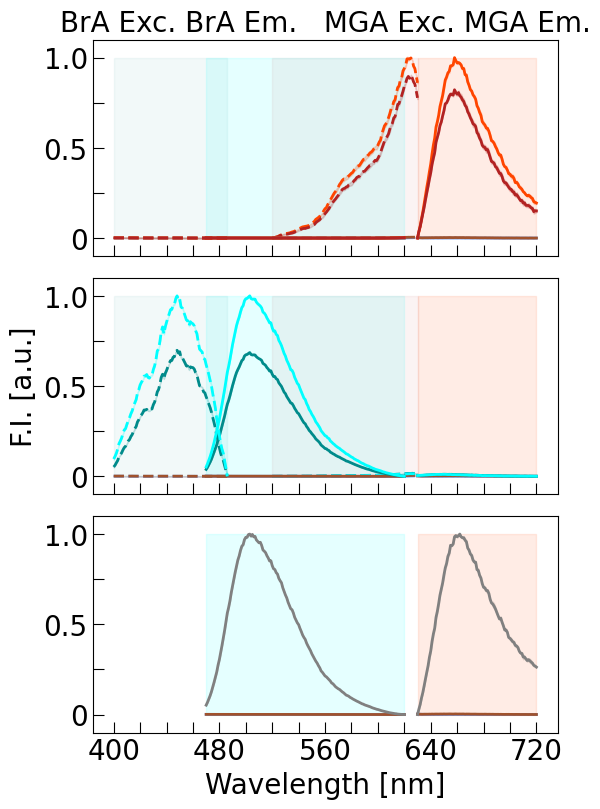

In [13]:
# Figure S1

labels = {'Water': 'Water', 'IVTM' : 'IVTM', 
          'A_bar' : r'$\overline{A}$', 'A' : 'A', 
          'B_bar' : r'$\overline{B}$', 'B' : 'B',
          'C' : 'C'}
          
plt.rcParams['mathtext.default'] = 'regular'
plt.subplots(3, 1, figsize = (6, 9), sharey = True, sharex = True)
plt.subplots_adjust(wspace = 0.10, hspace = 0.10)
plt.subplot(311)

for sample in ['Water', 'IVTM', 'A', 'A_bar']: 
    plt.plot(mg_em_wav, mg_channel_em_mean_norm[sample]*maxes_mg_em_ratios[sample], lw = 2.0, color = colours[sample])
    plt.fill_between(mg_em_wav, mg_channel_em_mean_norm[sample]*maxes_mg_em_ratios[sample] - mg_channel_em_std_norm[sample]*maxes_mg_em_ratios[sample], 
                     mg_channel_em_mean_norm[sample]*maxes_mg_em_ratios[sample] + mg_channel_em_std_norm[sample]*maxes_mg_em_ratios[sample], alpha = 0.2, color = colours[sample])
    
    plt.plot(mg_exc_wav, mg_channel_exc_mean_norm[sample]*maxes_mg_exc_ratios[sample], lw = 2.0, color = colours[sample], ls = 'dashed')
    plt.fill_between(mg_exc_wav, mg_channel_exc_mean_norm[sample]*maxes_mg_exc_ratios[sample] - mg_channel_exc_std_norm[sample]*maxes_mg_exc_ratios[sample], 
                     mg_channel_exc_mean_norm[sample]*maxes_mg_exc_ratios[sample] + mg_channel_exc_std_norm[sample]*maxes_mg_exc_ratios[sample], alpha = 0.2, color = colours[sample])
    
ax1 = plt.gca()
#ax1.set_ylabel('dfhbi F.I. [a.u.]', fontsize = 20, color = 'darkcyan')
ax1.tick_params(direction = 'in', length = 8)
ax1.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [0, '', 0.5, '', 1.00], fontsize = 20)
ax1.set_ylim([-0.1, 1.1])

for sample in ['Water', 'IVTM', 'A', 'A_bar']: 
    plt.plot(dfhbi_em_wav[:151], dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(dfhbi_em_wav[:151], dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_ratios[sample] - dfhbi_channel_em_std_norm[sample][:151]*maxes_dfhbi_em_ratios[sample], 
                     dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_ratios[sample] + dfhbi_channel_em_std_norm[sample][:151]*maxes_dfhbi_em_ratios[sample], alpha = 0.2, color = colours[sample])
    
    plt.plot(dfhbi_exc_wav[:151], dfhbi_channel_exc_mean_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample], ls = 'dashed')
    plt.fill_between(dfhbi_exc_wav[:151], dfhbi_channel_exc_mean_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample] - dfhbi_channel_exc_std_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample], 
                     dfhbi_channel_exc_mean_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample] + dfhbi_channel_exc_std_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample], alpha = 0.2, color = colours[sample])

    
plt.fill_betweenx([0, 1], 400, 486, color = 'darkcyan', alpha = 0.05)
plt.fill_betweenx([0, 1], 470, 620, color = 'cyan', alpha = 0.1)

plt.fill_betweenx([0, 1], 520, 630, color = 'firebrick', alpha = 0.05)
plt.fill_betweenx([0, 1], 630, 720, color = 'orangered', alpha = 0.1)
plt.title('BrA Exc. BrA Em.   MGA Exc. MGA Em.', fontsize = 20)

plt.subplot(312)

for sample in ['Water', 'IVTM', 'B_bar', 'B']: 
    plt.plot(mg_em_wav, mg_channel_em_mean_norm[sample]*maxes_mg_em_ratios[sample], lw = 2.0, color = colours[sample])
    plt.fill_between(mg_em_wav, mg_channel_em_mean_norm[sample]*maxes_mg_em_ratios[sample] - mg_channel_em_std_norm[sample]*maxes_mg_em_ratios[sample], 
                     mg_channel_em_mean_norm[sample]*maxes_mg_em_ratios[sample] + mg_channel_em_std_norm[sample]*maxes_mg_em_ratios[sample], alpha = 0.2, color = colours[sample])
    
    plt.plot(mg_exc_wav, mg_channel_exc_mean_norm[sample]*maxes_mg_exc_ratios[sample], lw = 2.0, color = colours[sample], ls = 'dashed')
    plt.fill_between(mg_exc_wav, mg_channel_exc_mean_norm[sample]*maxes_mg_exc_ratios[sample] - mg_channel_exc_std_norm[sample]*maxes_mg_exc_ratios[sample], 
                     mg_channel_exc_mean_norm[sample]*maxes_mg_exc_ratios[sample] + mg_channel_exc_std_norm[sample]*maxes_mg_exc_ratios[sample], alpha = 0.2, color = colours[sample])
    
    
ax3 = plt.gca()
ax3.set_ylabel('F.I. [a.u.]', fontsize = 20, color = 'black')
ax3.tick_params(direction = 'in', length = 8)
ax3.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [0, '', 0.5, '', 1.00], fontsize = 20)
ax3.set_ylim([-0.1, 1.1])


for sample in ['Water', 'IVTM', 'B_bar', 'B']: 
    plt.plot(dfhbi_em_wav[:151], dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(dfhbi_em_wav[:151], dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_ratios[sample] - dfhbi_channel_em_std_norm[sample][:151]*maxes_dfhbi_em_ratios[sample], 
                     dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_ratios[sample] + dfhbi_channel_em_std_norm[sample][:151]*maxes_dfhbi_em_ratios[sample], alpha = 0.2, color = colours[sample])

    plt.plot(dfhbi_exc_wav[:151], dfhbi_channel_exc_mean_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample], ls = 'dashed')
    plt.fill_between(dfhbi_exc_wav[:151], dfhbi_channel_exc_mean_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample] - dfhbi_channel_exc_std_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample], 
                     dfhbi_channel_exc_mean_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample] + dfhbi_channel_exc_std_norm[sample][:151]*maxes_dfhbi_exc_ratios[sample], alpha = 0.2, color = colours[sample])

    
plt.fill_betweenx([0, 1], 400, 486, color = 'darkcyan', alpha = 0.05)
plt.fill_betweenx([0, 1], 470, 620, color = 'cyan', alpha = 0.1)

plt.fill_betweenx([0, 1], 520, 630, color = 'firebrick', alpha = 0.05)
plt.fill_betweenx([0, 1], 630, 720, color = 'orangered', alpha = 0.1)

plt.subplot(313)

for sample in ['Water', 'IVTM', 'C']: 
    plt.plot(dfhbi_em_c_wav[:151], dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_c_ratios[sample], lw = 2.0, color = colours[sample], label = labels[sample])
    plt.fill_between(dfhbi_em_c_wav[:151], dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_c_ratios[sample] - dfhbi_channel_em_std_norm[sample][:151]*maxes_dfhbi_em_c_ratios[sample], 
                     dfhbi_channel_em_mean_norm[sample][:151]*maxes_dfhbi_em_c_ratios[sample] + dfhbi_channel_em_std_norm[sample][:151]*maxes_dfhbi_em_c_ratios[sample], alpha = 0.2, color = colours[sample])
    
    
ax5 = plt.gca()
ax5.tick_params(direction = 'in', length = 8)
#ax5.set_ylabel('dfhbi F.I. [a.u.]', fontsize = 20, color = 'darkcyan')
ax5.tick_params(direction = 'in', length = 8)
ax5.set_yticks([0, 0.25, 0.5, 0.75, 1.00], labels = [0, '', 0.5, '', 1.00], fontsize = 20)
ax5.set_ylim([-0.1, 1.1])
ax5.set_xticks([400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720], labels = [400, '', '', '', 480, '', '', '', 560, '', '', '', 640, '', '', '', 720], fontsize = 20)
ax5.set_xlabel('Wavelength [nm]', fontsize = 20)

for sample in ['Water', 'IVTM', 'C']: 
    plt.plot(mg_em_c_wav, mg_channel_em_mean_norm[sample]*maxes_mg_em_c_ratios[sample], lw = 2.0, color = colours[sample])
    plt.fill_between(mg_em_c_wav, mg_channel_em_mean_norm[sample]*maxes_mg_em_c_ratios[sample] - mg_channel_em_std_norm[sample]*maxes_mg_em_c_ratios[sample], 
                     mg_channel_em_mean_norm[sample]*maxes_mg_em_c_ratios[sample] + mg_channel_em_std_norm[sample]*maxes_mg_em_c_ratios[sample], alpha = 0.2, color = colours[sample])

plt.fill_betweenx([0, 1], 470, 620, color = 'cyan', alpha = 0.1)
plt.fill_betweenx([0, 1], 630, 720, color = 'orangered', alpha = 0.1)
plt.show()